# Lab 06 - Data Wrangling Skill: Part I
Four main concepts are covered in this lab: 
1. missing data;
2. outliers; 
3. skill in transformation: sub-setting & reshaping; 
4. date and time. 

In [1]:
import pandas as pd
import numpy as np

#since the original data has no header, we just add in using data.columns
data = pd.read_csv('Datasets/breast-cancer-wisconsin.data', sep=",", header=None)
data.columns=[
    "ID",
    "Clump_Thickness",
    "Uniformity_CellSize",
    "Uniformity_CellShape",
    "Marginal_Adhesion",
    "Single_Epithelial",
    "Bare_Nuclei",
    "Bland_Chromatin", 
    "Normal_Nucleoli", 
    "Mitoses",
    "Classes"
]
print (data.head()) #display the first few rows of data
data.describe()

        ID  Clump_Thickness  Uniformity_CellSize  Uniformity_CellShape  \
0  1000025                5                    1                     1   
1  1002945                5                    4                     4   
2  1015425                3                    1                     1   
3  1016277                6                    8                     8   
4  1017023                4                    1                     1   

   Marginal_Adhesion  Single_Epithelial Bare_Nuclei  Bland_Chromatin  \
0                  1                  2           1                3   
1                  5                  7          10                3   
2                  1                  2           2                3   
3                  1                  3           4                3   
4                  3                  2           1                3   

   Normal_Nucleoli  Mitoses  Classes  
0                1        1        2  
1                2        1        2  
2    

,ID,Clump_Thickness,Uniformity_CellSize,Uniformity_CellShape,Marginal_Adhesion,Single_Epithelial,Bland_Chromatin,Normal_Nucleoli,Mitoses,Classes
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### 6.1 Identify the Missing Data

In the real world, data scientist will explore the data to define any missing data. Sometimes missing data may contain some weird characters, sometimes it is blank, or null. In the data description, we know that the missing data for breast cancer is recorded as "?". If you try to search and explore the missing values, you find nothing. 

In [2]:
print(data.isnull().sum()) #returns 0.

ID                      0
Clump_Thickness         0
Uniformity_CellSize     0
Uniformity_CellShape    0
Marginal_Adhesion       0
Single_Epithelial       0
Bare_Nuclei             0
Bland_Chromatin         0
Normal_Nucleoli         0
Mitoses                 0
Classes                 0
dtype: int64


Convert the missing data from “?” to “NaN”. Which attribute is having missing data? 

In [3]:
#replace the missing data
#observe that the missing data is contains in Bare_Nuclei
data = data.replace('?',np.NaN)

print('\nNumber of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))


Number of instances = 699
Number of attributes = 11
Number of missing values:
	ID: 0
	Clump_Thickness: 0
	Uniformity_CellSize: 0
	Uniformity_CellShape: 0
	Marginal_Adhesion: 0
	Single_Epithelial: 0
	Bare_Nuclei: 16
	Bland_Chromatin: 0
	Normal_Nucleoli: 0
	Mitoses: 0
	Classes: 0


### 6.2 Handling Missing Data
Two types of handling missing data:
1. Fill up using median; or
2. Impute by using linear interpolation.

In [4]:
#Filling up missing value with median
data_impMedian = data.Bare_Nuclei.fillna(data.Bare_Nuclei.median())#, inplace = True)
data_impMedian.isnull().sum() #now no more missing values for column Bare_Nuclei

0

In [5]:
#Impute by using linear interpolation; inplace = True is not set to not rewrite the original data.
data_impInter = data.Bare_Nuclei.interpolate(method='linear', direction = 'forward') 
data_impInter.isna().any()

True

### 6.3 Outliers
All the necessary modules:
- Pandas and Numpy
- Seaborn and matplotlib > For outliers visualization
- zscore from scipy.stats for outliers > For explore outliers 

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.datasets import fetch_california_housing
from math import cos,pi

In [4]:
#download the data and assign to Data1.
Data1 = fetch_california_housing()

#check feature names
Data1.feature_names

#convert to pd df.
House = pd.DataFrame(Data1.data, columns=Data1.feature_names)
display(House.head())

House.shape

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


(20640, 8)

Outliers visualisations:
- Boxplot
- Scatterplot
- Histogram
- Z-score calculation

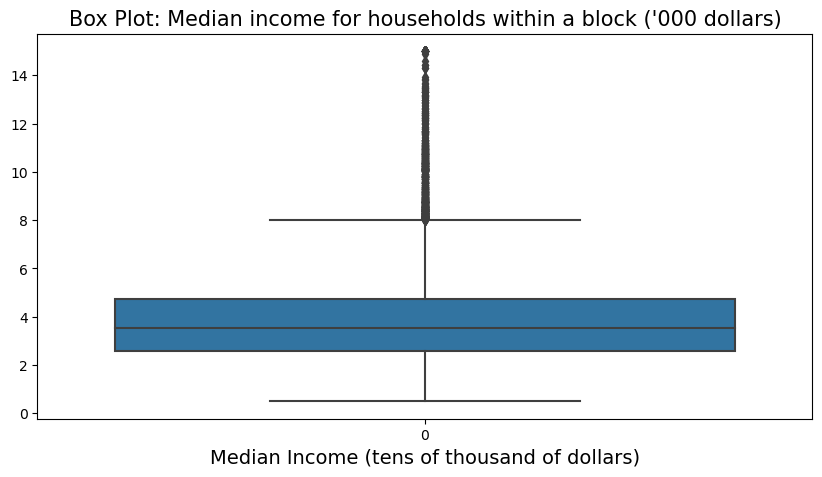

In [8]:
#Boxplot
fig = plt.figure(figsize=(10,5))
sns.boxplot(House.MedInc)
plt.title(
    'Box Plot: Median income for households within a block (\'000 dollars)', 
    fontsize=15)
plt.xlabel(
    'Median Income (tens of thousand of dollars)', 
    fontsize=14)
plt.show()

Text(0.5, 1.0, 'Median Income vs Population')

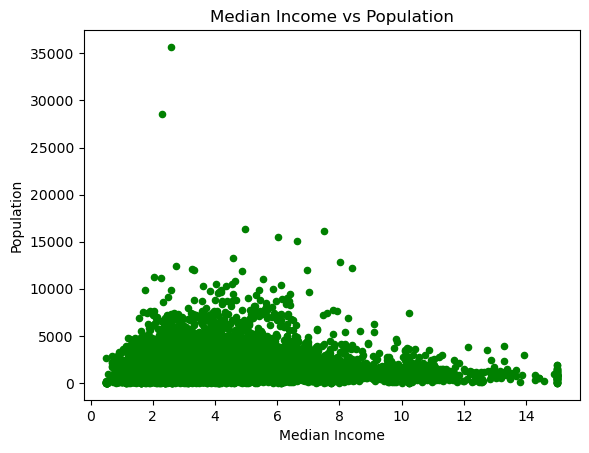

In [9]:
#Scatterplot
House.plot(kind='scatter', x='MedInc', y='Population', alpha=1, color='green')
plt.xlabel('Median Income')
plt.ylabel('Population')
plt.title('Median Income vs Population')

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

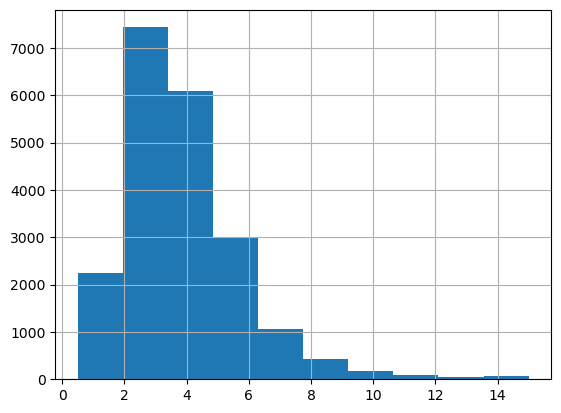

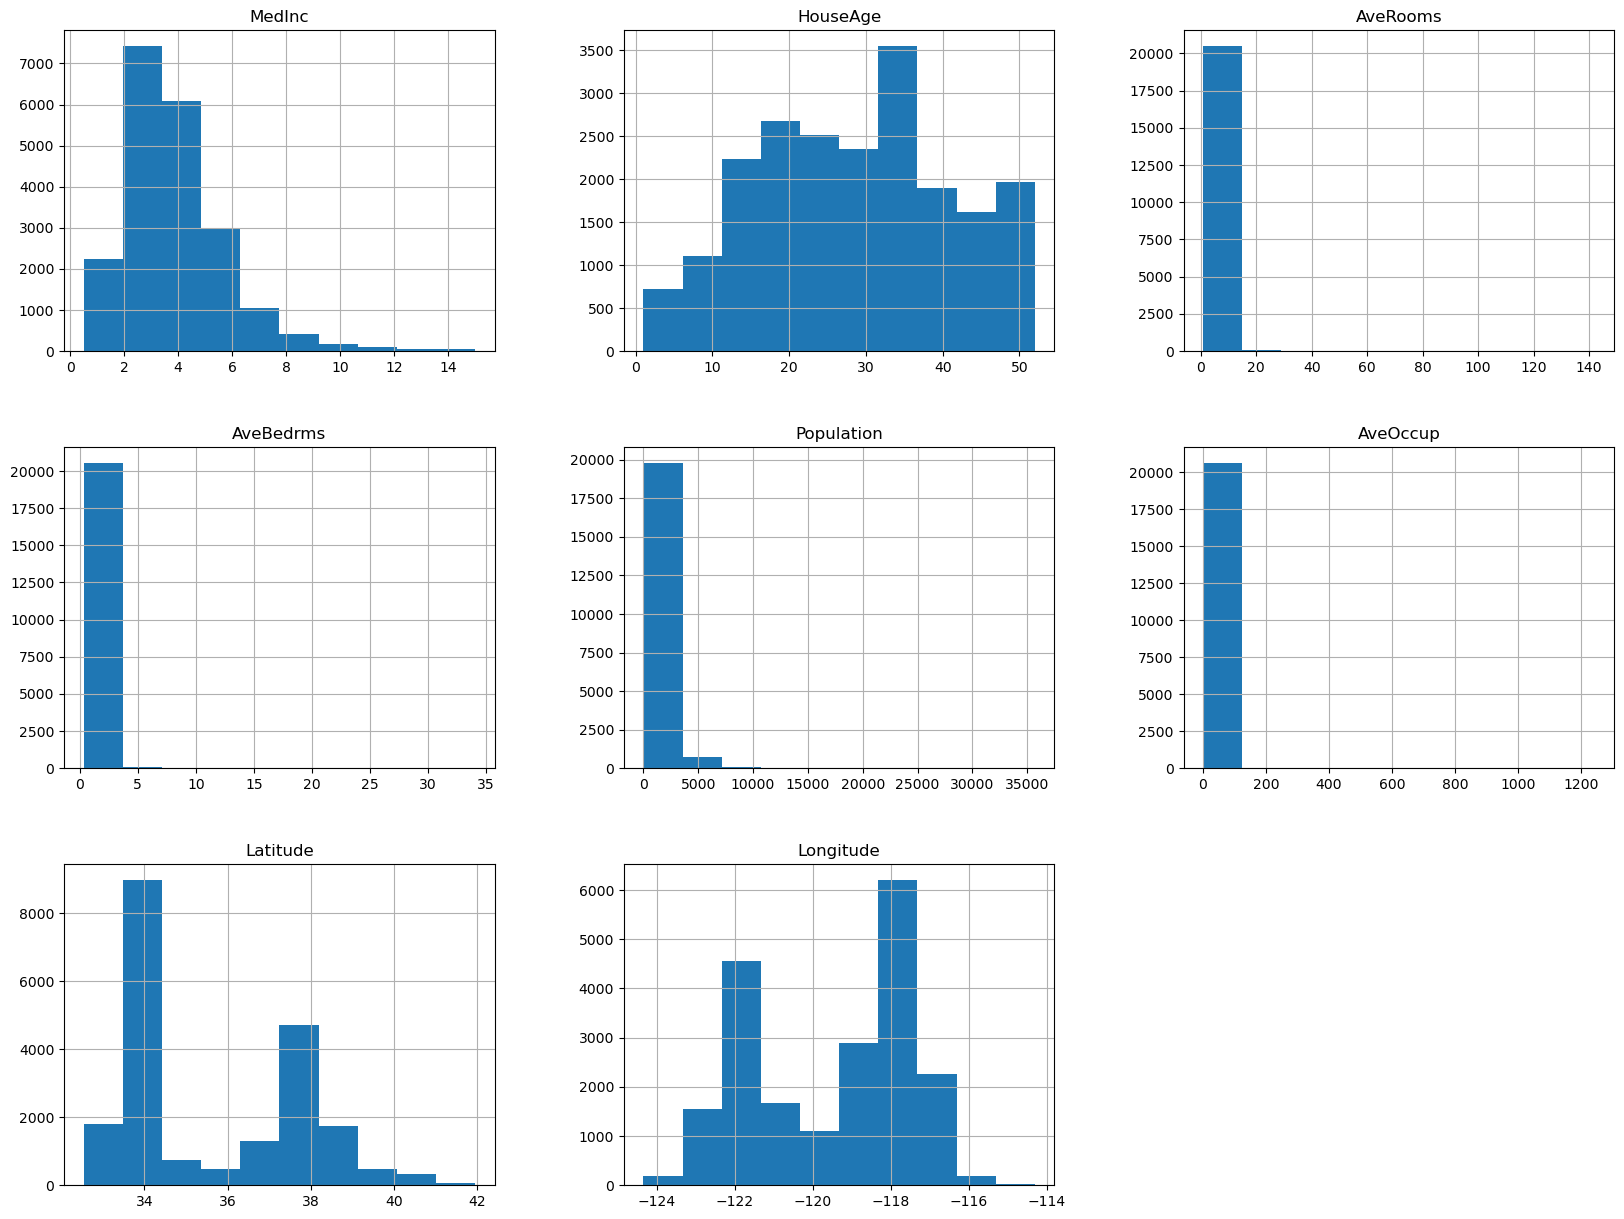

In [10]:
#Histogram
House.MedInc.hist() #single feature
House.hist(figsize = (20,15)) #all features

In [11]:
#Z-score calculation
result = zscore(House.MedInc)
#add result as additional attribute in House
House['resultZ'] = result

Typically, z-score can be used to explore and identify outliers. Add one additional column to store the value of z-score. (&pm; 3)

In [12]:
display(House[~((House['resultZ'] < 3) & (House['resultZ'] > -3))]) 

#remove such outliers and restore data 
House_noOutliers = House[((House['resultZ'] < 3) & (House['resultZ'] > -3))]
display(House_noOutliers)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,resultZ
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,4.069443
409,10.0825,52.0,8.209016,1.024590,658.0,2.696721,37.90,-122.28,3.269770
510,11.8603,39.0,7.911111,0.984127,808.0,2.565079,37.82,-122.22,4.205564
511,13.4990,42.0,8.928358,1.000000,1018.0,3.038806,37.82,-122.22,5.068140
512,12.2138,52.0,9.210227,1.039773,1001.0,2.843750,37.82,-122.23,4.391639
...,...,...,...,...,...,...,...,...,...
20376,10.2614,16.0,6.421277,0.919149,578.0,2.459574,34.16,-118.86,3.363939
20380,10.1597,16.0,7.606936,1.121387,450.0,2.601156,34.14,-118.83,3.310406
20389,10.0595,26.0,8.692308,1.076923,573.0,3.148352,34.19,-118.90,3.257663
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,3.251189


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,resultZ
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.344766
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.332238
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.782699
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.932968
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,-0.012881
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,-1.216128
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,-0.691593
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,-1.142593
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,-1.054583


### 6.4 Subsetting

The data contains a lot of missing values. We can use precision method to remove columns that have 80% of missing values. By using:
`data.isnull().sum(axis=1) / len(data.columns)-1`

In [13]:
import pandas as pd
import numpy as np

data = pd.read_excel('Datasets/cell phone total.xlsx', header=[0]) 
print(data.head())

  Mobile cellular subscriptions, total number  1965  1966  1967  1968  1969  \
0                                    Abkhazia   NaN   NaN   NaN   NaN   NaN   
1                                 Afghanistan   0.0   NaN   NaN   NaN   NaN   
2                       Akrotiri and Dhekelia   NaN   NaN   NaN   NaN   NaN   
3                                     Albania   0.0   NaN   NaN   NaN   NaN   
4                                     Algeria   0.0   NaN   NaN   NaN   NaN   

   1970  1971  1972  1973  ...      2002       2003       2004        2005  \
0   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN         NaN   
1   0.0   NaN   NaN   NaN  ...   25000.0   200000.0   600000.0   1200000.0   
2   NaN   NaN   NaN   NaN  ...       NaN        NaN        NaN         NaN   
3   0.0   NaN   NaN   NaN  ...  851000.0  1100000.0  1259590.0   1530244.0   
4   0.0   NaN   NaN   NaN  ...  450244.0  1446927.0  4882414.0  13661355.0   

         2006        2007        2008        2009       

In [14]:
threshold = data.isnull().sum(axis=1)/(len(data.columns)-1) 

#exclude the 1st column which is the name of countries
remove_row = threshold[threshold>0.8].index

data.drop(remove_row, axis=0, inplace = True)
print(data.head()) 

#check to make sure it moves only those with missing values >80%
print(len(data))

  Mobile cellular subscriptions, total number  1965  1966  1967  1968  1969  \
1                                 Afghanistan   0.0   NaN   NaN   NaN   NaN   
3                                     Albania   0.0   NaN   NaN   NaN   NaN   
4                                     Algeria   0.0   NaN   NaN   NaN   NaN   
5                              American Samoa   0.0   NaN   NaN   NaN   NaN   
6                                     Andorra   0.0   NaN   NaN   NaN   NaN   

   1970  1971  1972  1973  ...      2002       2003       2004        2005  \
1   0.0   NaN   NaN   NaN  ...   25000.0   200000.0   600000.0   1200000.0   
3   0.0   NaN   NaN   NaN  ...  851000.0  1100000.0  1259590.0   1530244.0   
4   0.0   NaN   NaN   NaN  ...  450244.0  1446927.0  4882414.0  13661355.0   
5   0.0   NaN   NaN   NaN  ...    2036.0     2100.0     2250.0         NaN   
6   0.0   NaN   NaN   NaN  ...   32790.0    51893.0    58366.0     64560.0   

         2006        2007        2008        2009       

In [15]:
#check for duplicate data 
data.duplicated()

1      False
3      False
4      False
5      False
6      False
       ...  
250    False
251    False
254    False
256    False
257    False
Length: 204, dtype: bool

In [16]:
# Print out all the columns. Suppose the 1st column is not treated as column. Rename the 1st columns as ‘Country’. 
print(data.columns)
data.rename(columns={'Mobile cellular subscriptions, total number':'Country'}, inplace = True)
print(data.head())

Index(['Mobile cellular subscriptions, total number', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011'],
      dtype='object')
          Country  1965  1966  1967  1968  1969  1970  1971  1972  1973  ...  \
1     Afghanistan   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN  ...   
3         Albania   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN  ...   
4         Algeria   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN  ...   
5  American Samoa   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN  ...   
6         Andorra   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN  ...   

       2002       2003       20

In [17]:
# set country as index.
data.set_index("Country", inplace = True)
print(data.head())

                1965  1966  1967  1968  1969  1970  1971  1972  1973  1974  \
Country                                                                      
Afghanistan      0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Albania          0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Algeria          0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
American Samoa   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Andorra          0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   

                ...      2002       2003       2004        2005        2006  \
Country         ...                                                           
Afghanistan     ...   25000.0   200000.0   600000.0   1200000.0   2520366.0   
Albania         ...  851000.0  1100000.0  1259590.0   1530244.0   1909885.0   
Algeria         ...  450244.0  1446927.0  4882414.0  13661355.0  20997954.0   
American Samoa  ...    2036.0     2100.0     2250.0       

Subsetting by columns: now select the subset of United Kingdom and save in `data_sub1`, then extract Northern European countries:

> Note: if you putting a wrong brackets for .loc function, you may get an error as Too Many Indexers

Then continue to get only selected columns by using `loc[:, "COL_NAMES"]`, with optional sorting with `.sort_values(by=['COL'])`

In [18]:
#Subsetting by columns: now select the subset of United Kingdom and save in data_sub1.
data_sub1 = data.loc["United Kingdom"]
print(data_sub1)

1965           0.0
1966           NaN
1967           NaN
1968           NaN
1969           NaN
1970           0.0
1971           NaN
1972           NaN
1973           NaN
1974           NaN
1975           0.0
1976           0.0
1977           0.0
1978           0.0
1979           0.0
1980           0.0
1981           0.0
1982           0.0
1983           0.0
1984           0.0
1985       50000.0
1986      130000.0
1987      290000.0
1988      560000.0
1989      975000.0
1990     1114000.0
1991     1260000.0
1992     1507000.0
1993     2268000.0
1994     3940000.0
1995     5735785.0
1996     7248355.0
1997     8841000.0
1998    14878000.0
1999    27185000.0
2000    43452000.0
2001    46283000.0
2002    49228000.0
2003    54256221.0
2004    59687915.0
2005    65471665.0
2006    70077926.0
2007    73836210.0
2008    76735443.0
2009    80255445.0
2010    81115492.0
2011    81612000.0
Name: United Kingdom, dtype: float64


In [19]:
#obtain index of all the Northen European countries
data_sub1 = data.loc[["United Kingdom","Sweden", "Denmark", "Finland", "Norway","Ireland", "Lithuania", "Latvia", "Estonia", "Iceland"]]
print(data_sub1)

type(data_sub1) #check the type of data_sub1, it is a data frame

                1965  1966  1967  1968  1969  1970  1971  1972  1973  1974  \
Country                                                                      
United Kingdom   0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Sweden           0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Denmark          0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Finland          0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Norway           0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Ireland          0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Lithuania        0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Latvia           0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Estonia          0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
Iceland          0.0   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   

                ...        2002        2003        2004        

pandas.core.frame.DataFrame

In [20]:
# Continue to extract only data from 2000 to 2011 from data_sub1.
# Then sort the values according to a specific column. 
data_sub1.loc[:, '2000':'2011'].sort_values(by=['Country'])

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country,,,,,,,,,,,,
Denmark,3363552.0,3960165.0,4477752.0,4767100.0,5166912.0,5449206.0,5828157.0,6308000.0,6556988.0,6833683.0,6981000.0,7047000.0
Estonia,557000.0,651200.0,881000.0,1050241.0,1255731.0,1445300.0,1658700.0,1681849.0,1624465.0,1570538.0,1652809.0,1863120.0
Finland,3728625.0,4175587.0,4516772.0,4747126.0,4988000.0,5270000.0,5670000.0,6080000.0,6830000.0,7700000.0,8390000.0,8940000.0
Iceland,214896.0,248131.0,260438.0,279670.0,290068.0,283108.0,301922.0,326098.0,336922.0,339715.0,341077.0,344085.0
Ireland,2461000.0,2970000.0,3000000.0,3500000.0,3860000.0,4270000.0,4690135.0,4970719.0,5048127.0,4704497.0,4701474.0,4906352.0
Latvia,401272.0,656835.0,917196.0,1219550.0,1536712.0,1871602.0,2183696.0,2217008.0,2298610.0,2303600.0,2306100.0,2309000.0
Lithuania,524000.0,1017999.0,1645568.0,2102207.0,3051160.0,4353447.0,4718215.0,4912077.0,5022638.0,4961499.0,4890979.0,5004150.0
Norway,3224000.0,3593000.0,3790000.0,4060829.0,4524750.0,4754453.0,4868916.0,5037650.0,5211207.0,5359640.0,5648673.0,5750000.0
Sweden,6372300.0,7178000.0,7949000.0,8801000.0,8785000.0,9104000.0,9607000.0,10116852.0,10014000.0,10440000.0,10885406.0,11194000.0


Subsetting a data to only select row and columns, and based on their conditions.

In [21]:
#Subset the data to only Finland, Norway, and Ireland with the cellular subscription for year 2003 and 2005. Then filter the data where the subscription amount of year 2005 is less than 4000000. Store this subset and replace data_sub2.

data_sub2 = data.loc[["Finland","Norway", "Ireland"],['2003','2005']] 
print(data_sub2)

print(data_sub2[data_sub2['2005'] < 4500000])

              2003       2005
Country                      
Finland  4747126.0  5270000.0
Norway   4060829.0  4754453.0
Ireland  3500000.0  4270000.0
              2003       2005
Country                      
Ireland  3500000.0  4270000.0


### 6.5 Reshaping
Reshaping the table by using `melt()` or `stack()`:


Let the Country be a column, Year be a column, and Value be a column.\
Store the new reshape data in data_new reset index so that Country is not an index for us to make it a data column.

In [22]:
data_sub2.describe()
data_new=pd.melt(data_sub2)

data_sub2 = data_sub2.reset_index()
data_sub2.columns = data_sub2.columns.str.replace(' ', '')

data_new = pd.melt(data_sub2, id_vars = ['Country'], value_vars = ['2003', '2005'], var_name='Years', value_name='Values')
print(data_new)

   Country Years     Values
0  Finland  2003  4747126.0
1   Norway  2003  4060829.0
2  Ireland  2003  3500000.0
3  Finland  2005  5270000.0
4   Norway  2005  4754453.0
5  Ireland  2005  4270000.0


In [23]:
data_sub2.stack() #normal stack method (run and check the output)

0  Country      Finland
   2003       4747126.0
   2005       5270000.0
1  Country       Norway
   2003       4060829.0
   2005       4754453.0
2  Country      Ireland
   2003       3500000.0
   2005       4270000.0
dtype: object

In [24]:
data_sub2.set_index(['Country']).stack().reset_index() #set the index

,Country,level_1,0
0,Finland,2003,4747126.0
1,Finland,2005,5270000.0
2,Norway,2003,4060829.0
3,Norway,2005,4754453.0
4,Ireland,2003,3500000.0
5,Ireland,2005,4270000.0


In [25]:
#Reshape data_new from long to wide by using pivot function of pandas
print(data_new) #print before change

   Country Years     Values
0  Finland  2003  4747126.0
1   Norway  2003  4060829.0
2  Ireland  2003  3500000.0
3  Finland  2005  5270000.0
4   Norway  2005  4754453.0
5  Ireland  2005  4270000.0


In [26]:
data_new = data_new.pivot(index = 'Country', columns='Years', values='Values')
print(data_new) # print after change

Years         2003       2005
Country                      
Finland  4747126.0  5270000.0
Ireland  3500000.0  4270000.0
Norway   4060829.0  4754453.0


> Note: to avoid key error such as id_vear not present, you can try to reset the index of `data_sub2`, and remove whitespaces in column names (if any).

In [27]:
data_sub2 = data_sub2.reset_index() 
data_sub2.columns = data_sub2.columns.str.replace(' ', '')

print(data_sub2)

   index  Country       2003       2005
0      0  Finland  4747126.0  5270000.0
1      1   Norway  4060829.0  4754453.0
2      2  Ireland  3500000.0  4270000.0


### 6.6 Date and Time

This section will focus on date and time, in order to analyze time series data. There are two ways to convert date and time:

1. Using `to_datetime()`: `pd.to_datetime(DF['COLUMN'], format = 'FORMAT').dt.(date|time)`
2. Using `parse_dates()` or `astype()`

In [28]:
data = pd.read_csv('Datasets/AirQualityUCI.csv', header=[0], sep=";")
print(data.head())
print(data.shape)

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

Before proceeding, handle the missing data. We need to work with data without missing values.
- Remove any columns with missing data more than 80%.

In [29]:
threshold=data.isnull().sum()/len(data) 
print(threshold)

#get the index of each columns and store in remove_col
remove_col = threshold[threshold>0.8].index 

data.drop(remove_col, axis=1, inplace = True)
print(data.columns)
threshold = data.isnull().sum(axis=1)/(len(data.columns)-1)
print(threshold)

remove_row = threshold[threshold>0.8].index
data.drop(remove_row, axis=0, inplace = True)
print(data.head()) #check to make sure it moves only those with missing values >80%
print(len(data))

Date             0.012037
Time             0.012037
CO(GT)           0.012037
PT08.S1(CO)      0.012037
NMHC(GT)         0.012037
C6H6(GT)         0.012037
PT08.S2(NMHC)    0.012037
NOx(GT)          0.012037
PT08.S3(NOx)     0.012037
NO2(GT)          0.012037
PT08.S4(NO2)     0.012037
PT08.S5(O3)      0.012037
T                0.012037
RH               0.012037
AH               0.012037
Unnamed: 15      1.000000
Unnamed: 16      1.000000
dtype: float64
Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
9466    1.071429
9467    1.071429
9468    1.071429
9469    1.071429
9470    1.071429
Length: 9471, dtype: float64
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6    

Before converting to time, check the datatype of the date and time first. Then convert to time.\
\
If you want to parsing Time directly, error is occurred. This may also happen to Date if the default format is not match. \
What you can do is specify the original format from the data to avoid parsing error. For e.g., in this data, the time format is 18.00.00, we can declare this format = '%H.%M.%S'

In [30]:
print(data.dtypes)
data.columns

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object


Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [31]:
#change the type of Date by using to_datetime function.
data['Date'] = pd.to_datetime(data['Date'])
#changing the time may cause error due to incorrect format hence as specified.
data['Time'] = pd.to_datetime(data['Time'], format = '%H.%M.%S').dt.time

C:\Users\Fang\AppData\Local\Temp\ipykernel_7100\2531864901.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [32]:
# Another alternative way to transform object date is using parse_dates or astype. 
# alternative 1
data1 = pd.read_csv("Datasets\AirQualityUCI.csv", header=[0], sep=";", parse_dates=["Date"])
data1.dtypes

#alternative 2
data2 = pd.read_csv("Datasets\AirQualityUCI.csv", header=[0], sep=";")
data2['Date'] = data2.Date.astype('datetime64[ns]')
data2.dtypes


C:\Users\Fang\AppData\Local\Temp\ipykernel_7100\4040617955.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1 = pd.read_csv("Datasets\AirQualityUCI.csv", header=[0], sep=";", parse_dates=["Date"])
C:\Users\Fang\AppData\Local\Temp\ipykernel_7100\4040617955.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data2['Date'] = data2.Date.astype('datetime64[ns]')


Date             datetime64[ns]
Time                     object
CO(GT)                   object
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                 object
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                        object
RH                       object
AH                       object
Unnamed: 15             float64
Unnamed: 16             float64
dtype: object

In [33]:
#7.	Assemble Multiple Columns

data3 = pd.DataFrame({'Year': [2020, 2021], 'Month': [6,7], 'Day': [1,2]})
data3['Date'] = pd.to_datetime(data3)
data3

,Year,Month,Day,Date
0,2020,6,1,2020-06-01
1,2021,7,2,2021-07-02


In [34]:
#8.	To extract day, month and year:

data['Year'] = data['Date'].dt.year
data['Month']= data['Date'].dt.month
data['Day']= data['Date'].dt.day

data['week_of_year'] = data['Date'].dt.week
data['day_of_week'] = data['Date'].dt.dayofweek
data['is_leap_year'] = data['Date'].dt.is_leap_year

data.head()

C:\Users\Fang\AppData\Local\Temp\ipykernel_7100\388989176.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week_of_year'] = data['Date'].dt.week


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,PT08.S5(O3),T,RH,AH,Year,Month,Day,week_of_year,day_of_week,is_leap_year
0,2004-10-03,18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,...,1268.0,"13,6","48,9","0,7578",2004,10,3,40,6,True
1,2004-10-03,19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,...,972.0,"13,3","47,7","0,7255",2004,10,3,40,6,True
2,2004-10-03,20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,...,1074.0,"11,9","54,0","0,7502",2004,10,3,40,6,True
3,2004-10-03,21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,...,1203.0,"11,0","60,0","0,7867",2004,10,3,40,6,True
4,2004-10-03,22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,...,1110.0,"11,2","59,6","0,7888",2004,10,3,40,6,True
